In [2]:
import sys
sys.path.append('../../')
import numpy as np
import matplotlib.pyplot as plt
from src.VideoProcessor import VideoProcessor
from src.metrics import NRMSE, PSNR, SSIM

In [3]:
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['DejaVu Serif', 'Liberation Serif']
plt.rcParams["font.size"] = 12
plt.rcParams['figure.constrained_layout.use'] = True

In [4]:
dataset_path = r"../../data/dataset_2drt_video_only"
nSubs = [f"sub{str(i).zfill(3)}" for i in range(1, 2)]
vp = VideoProcessor(dataset_path, nSubs=nSubs, norm=True)

dataset = vp.extract_frames(target="vcv")
n = list(dataset.keys())
print(n)

['sub001_2drt_03_vcv3_r1_video', 'sub001_2drt_01_vcv1_r2_video', 'sub001_2drt_02_vcv2_r2_video', 'sub001_2drt_03_vcv3_r2_video', 'sub001_2drt_02_vcv2_r1_video', 'sub001_2drt_01_vcv1_r1_video']


In [5]:
speckle = vp.noise(dataset, type="speckle", std=0.1)
gaussian = vp.noise(dataset, type="gaussian", std=0.1)
rayleigh = vp.noise(dataset, type="rayleigh", std=0.1)
rician = vp.noise(dataset, type="rician", std=0.1)

Note: Multiplicative speckle noise.


Note: Additive gaussian-distributed noise as limit case of the Rician Distribution, since complex-valued image/k-space is not used.
Note: Adding Rayleigh-distributed noise as limit case of the Rician Distribution.
Note: Simulated Rician-distributed noise.


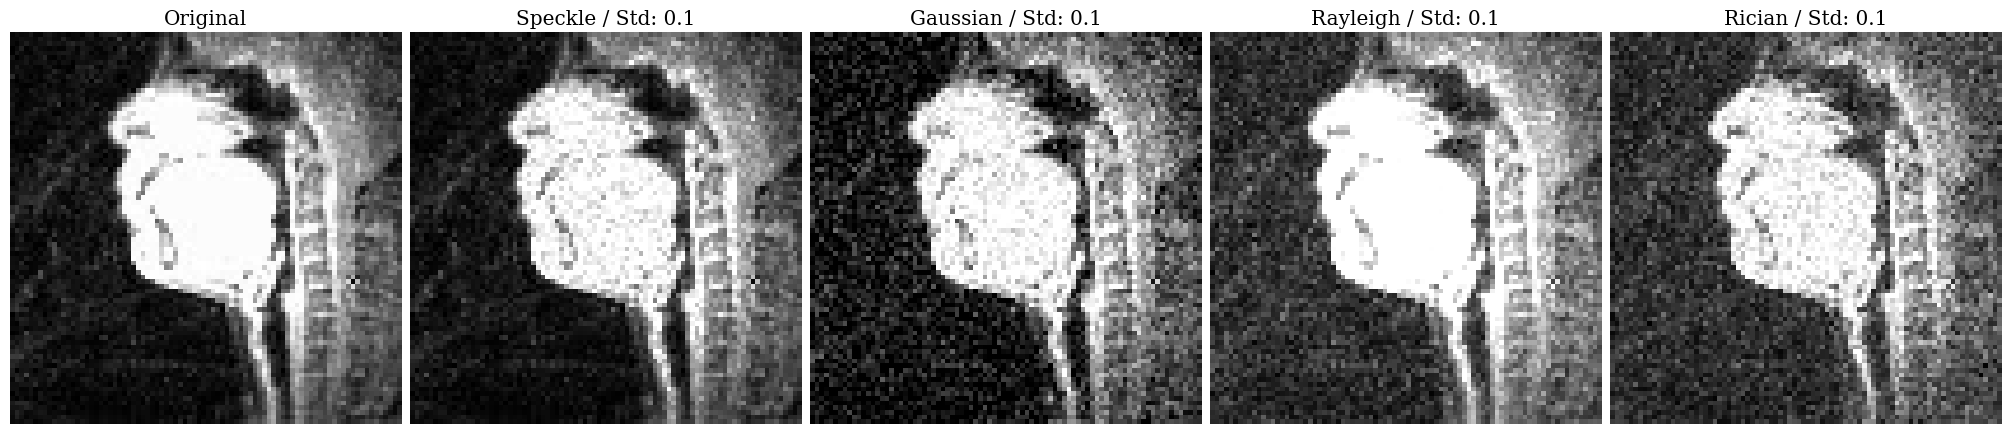

In [6]:
video = n[1]

_, ax = plt.subplots(1, 5, figsize=(20, 5))
ax[0].imshow(dataset[video][0], cmap="gray"), ax[0].set_title("Original"),  ax[0].axis("off")
ax[1].imshow(speckle[video][0], cmap="gray"), ax[1].set_title(f"Speckle / Std: {0.1}"),   ax[1].axis("off")
ax[2].imshow(gaussian[video][0], cmap="gray"), ax[2].set_title(f"Gaussian / Std: {0.1}"), ax[2].axis("off")
ax[3].imshow(rayleigh[video][0], cmap="gray"), ax[3].set_title(f"Rayleigh / Std: {0.1}"), ax[3].axis("off")
ax[4].imshow(rician[video][0], cmap="gray"), ax[4].set_title(f"Rician / Std: {0.1}"),     ax[4].axis("off")
plt.show()


In [7]:
from matplotlib.patches import Rectangle

def calc_snr(x, signal_box_coords, noise_box_coords):
    signal_y, signal_x, signal_width, signal_height = signal_box_coords
    noise_y, noise_x, noise_width, noise_height = noise_box_coords

    signal = x[signal_y: signal_y + signal_height, signal_x:signal_x + signal_width]
    noise = x[noise_y: noise_y + noise_height, noise_x:noise_x + noise_width]
    return np.mean(signal) / np.std(noise)


def annotate_metrics(src, ax, signal_box_coords, noise_box_coords,  font_size = 15, font_color = "yellow", font_weight = "bold"):
    snr = calc_snr(src, signal_box_coords, noise_box_coords)    
    text = f"{snr:.3f}"

    ax.annotate(
        text,
        xy=(0, 1),
        xytext=(2, -2),
        fontsize=font_size,
        color=font_color,
        xycoords="axes fraction",
        textcoords="offset points",
        horizontalalignment="left",
        verticalalignment="top",
        fontweight=font_weight,
    )


def draw_box(ax, box_coords, box_linewidth = 2, box_edgecolor = "r"):
    y, x, width, height = box_coords
    rect = Rectangle(
        (x, y), width=width, height=height, linewidth=box_linewidth, edgecolor=box_edgecolor, facecolor="none"
    )
    ax.add_patch(rect)

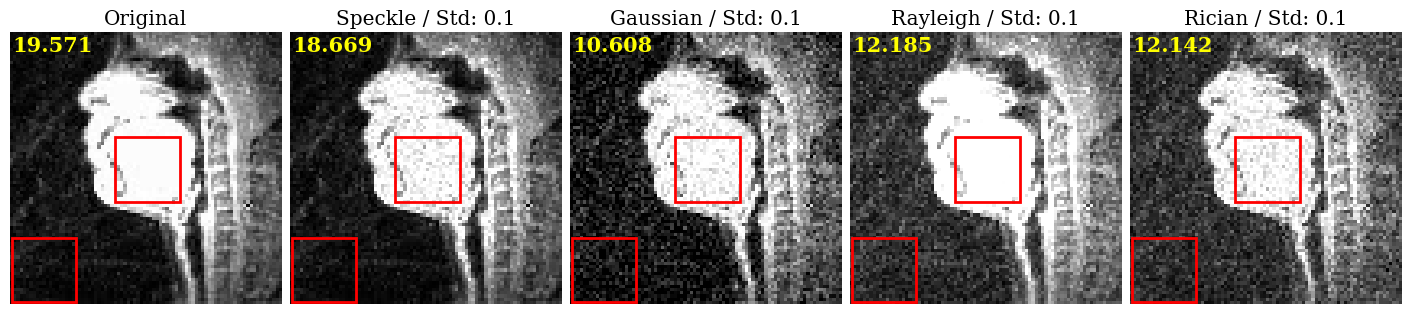

In [8]:
signal_box_coords = (32, 32, 20, 20)
noise_box_coords = (63, 0, 20, 20)

video = n[1]

_, ax = plt.subplots(1, 5, figsize=(14, 16))
ax[0].imshow(dataset[video][0], cmap="gray"), ax[0].set_title("Original"),  ax[0].axis("off")
ax[1].imshow(speckle[video][0], cmap="gray"), ax[1].set_title(f"Speckle / Std: {0.1}"),   ax[1].axis("off")
ax[2].imshow(gaussian[video][0], cmap="gray"), ax[2].set_title(f"Gaussian / Std: {0.1}"), ax[2].axis("off")
ax[3].imshow(rayleigh[video][0], cmap="gray"), ax[3].set_title(f"Rayleigh / Std: {0.1}"), ax[3].axis("off")
ax[4].imshow(rician[video][0], cmap="gray"), ax[4].set_title(f"Rician / Std: {0.1}"),     ax[4].axis("off")

annotate_metrics(dataset[video][0], ax[0], signal_box_coords, noise_box_coords)
annotate_metrics(speckle[video][0], ax[1], signal_box_coords, noise_box_coords)
annotate_metrics(gaussian[video][0], ax[2], signal_box_coords, noise_box_coords)
annotate_metrics(rayleigh[video][0], ax[3], signal_box_coords, noise_box_coords)
annotate_metrics(rician[video][0], ax[4], signal_box_coords, noise_box_coords)


for i in range(5):
    draw_box(ax[i], signal_box_coords)
    draw_box(ax[i], noise_box_coords)

plt.show()


(32, 32, 20, 20) (63, 0, 20, 20)
(32, 32, 20, 20) (63, 0, 20, 20)
(32, 32, 20, 20) (63, 0, 20, 20)
(32, 32, 20, 20) (63, 0, 20, 20)
(32, 32, 20, 20) (63, 0, 20, 20)


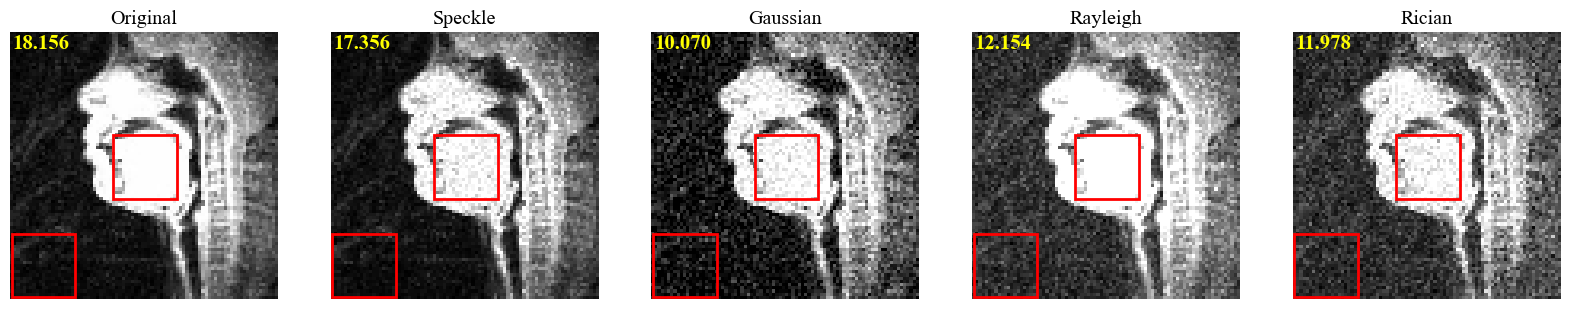

In [9]:
import src.utils as utils


utils.imshow([dataset[video][0], speckle[video][0], gaussian[video][0], rayleigh[video][0], rician[video][0]], titles=["Original", "Speckle", "Gaussian", "Rayleigh", "Rician"], fig_size=(20, 5))

In [ ]:
lis = [dataset[video][0], speckle[video][0], gaussian[video][0], rayleigh[video][0], rician[video][0]]


5